In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical #convert to one-hot encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import tensorflow as tf

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

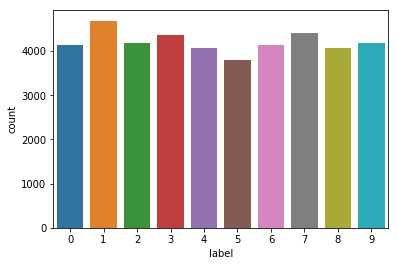

In [6]:
Y_train = train['label']
X_train = train.drop(labels=["label"], axis=1)
g=sns.countplot(Y_train)
Y_train.value_counts()

In [7]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In machine learning, a network (CNN, or ConvNet) is a class of deep, feed-forward artificial neural networks, most commonly applied to analyzing visual imagery.

CNNs use a variation of multilayer perceptrons designed to require minimal preprocessing.[1] They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics. To converge Convolution Neural Networks faster grayscale is better than 0-255 color pallete illumination. Image reconition is a complex process for a computer since it sees is this matrix, or this grid, of pixel intensity values that tells us the brightness of each pixel in the image. So the computer vision problem is to look at this matrix of pixel intensity values, and tell us that these numbers represent the door handle of a car. Concretely, when we use machine learning to build a car detector, what we do is we come up with a label training set, with, let's say, a few label examples of cars and a few label examples of things that are not cars, then we give our training set to the learning algorithm trained a classifier and then, you know, we may test it and show the new image and ask, "What is this new thing?". And hopefully it will recognize that that is a car. What is the dimension of the feature space? Suppose we were to use just 50 by 50 pixel images. Now that suppose our images were pretty small ones, just 50 pixels on the side. Then we would have 2500 pixels, 
and so the dimension of our feature size will be N equals 2500 where our feature vector x is a list of all the pixel testings, you know, the pixel brightness of pixel one, the brightness of pixel two, and so on down to the pixel brightness of the last pixel where, you know, in a typical computer representation, each of these may be values between say 0 to 255 if it gives us the grayscale value. So we have n equals 2500, and that's if we were using grayscale images. If we were using RGB images with separate red, green and blue values, we would have n equals 7500.
So, if we were to try to learn a nonlinear hypothesis by including all the quadratic features, that is all the terms of the form, you know, Xi times Xj, while with the 2500 pixels we would end up with a total of three million features. And that's just too large to be reasonable; the computation would be very expensive to find and to represent all of these three million features per training example. 
8:55
So, simple logistic regression together with adding in maybe the quadratic or the cubic features - that's just not a good way to learn complex nonlinear hypotheses when n is large because you just end up with too many features. In the next I would like to tell you about Neural Networks, which turns out to be a much better way to learn complex hypotheses, complex nonlinear hypotheses even when your input feature space, even when n is large. And along the way I'll also get to show you a of historically important applications 
of Neural networks
Neural Networks are a pretty old algorithm that was originally motivated by the goal of having machines that can mimic the brain. 
Neuroscientists have done the following fascinating experiments where you cut the wire from the ears to the auditory cortex and you re-wire, 
in this case an animal's brain, so that the signal from the eyes to the optic nerve eventually gets routed to the auditory cortex. 
If you do this it turns out, the auditory cortex will learn 
to see. And this is in every single sense of the word see as we know it. So, if you do this to the animals, the animals can perform visual discrimination task and as they can look at images and make appropriate decisions based on the images and they're doing it with that piece of brain tissue.  Because of this and other similar experiments, these are called neuro-rewiring experiments. 
There's this sense that if the same piece of physical brain tissue can process sight or sound or touch then maybe there is one learning algorithm that can process sight or sound or touch. And instead of needing to implement a thousand different programs or a thousand different algorithms to do, you know, the thousand wonderful things that the brain does, maybe what we need to do is figure out some approximation or to whatever the brain's learning algorithm is and implement that and that the brain learned by itself how to process these different types of data. 
To a surprisingly large extent, it seems as if we can plug in almost any sensor to almost any part of the brain and so, within the reason, the brain will learn to deal with it. 
how a Neural Network can be used to compute the functions x1 AND x2, and the function x1 OR x2 when x1 and x2 are binary, that is when they take on values 0,1. We can also have a network to compute negation, that is to compute the function not x1.
 Cells include negations, the general idea is to put that large negative weight in front of the variable you want to negate. Minus 20 multiplied by x1 and that's the general idea of how you end up negating x1.

In [9]:
#Normalizing to gray scale
X_train = X_train/255.0
test = test/255.0

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [11]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
random_seed=2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

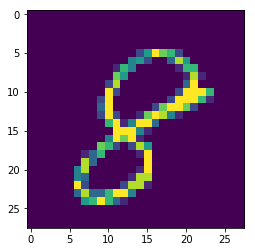

In [13]:
g = plt.imshow(X_train[0][:,:,0])

In [16]:
#CNN Model
model = tf.keras.models.Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation = "softmax"))

In [45]:
# # Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [17]:
#model = Sequential()
# Compile the model
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [47]:
# # Set a learning rate annealer
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)

In [48]:
# epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
# batch_size = 86

In [49]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(X_train)

In [50]:
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val),
#                               verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])

In [51]:
# # Convolutional Neural Network (CNN)

# # step 1 - Initialising the CNN
# classifier = Sequential()

In [52]:
# # step 2 - Convolution
# classifier.add(Conv2D(32, (3, 3), padding = 'Same', activation="relu", input_shape=(28, 28, 1)))

# # step 3-  Pooling
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# # adding another convulationary layer to make it deep neural net model 
# classifier.add(Conv2D(32, (3, 3), activation="relu"))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [53]:
# # step 4 - Flattening
# classifier.add(Flatten())

In [18]:
# # step 5- Full connection (hidden layers)
# classifier.add(Dense(output_dim = 256, activation = 'relu'))

# # adding output layer
# classifier.add(Dense(output_dim = 10, activation = 'softmax'))

In [55]:
# step-6 compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
# # step-7 fitting the CNN
# epochs=30
# batch_size=90

# classifier.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)

In [20]:
model.fit(X_train, Y_train, epochs=3)

Epoch 1/3
37800/37800 [==============================] - 4s 102us/step - loss: 0.2703 - acc: 0.9193
Epoch 2/3
37800/37800 [==============================] - 3s 83us/step - loss: 0.1101 - acc: 0.9658
Epoch 3/3
37800/37800 [==============================] - 3s 90us/step - loss: 0.0758 - acc: 0.9761


In [22]:
val_loss, val_acc = model.evaluate(X_val, Y_val)
print(val_loss)
print(val_acc)

4200/4200 [==============================] - 0s 50us/step
0.10066649453448398
0.9678571428571429


In [32]:
#Finally, with your model, you can save it super easily:
#from tensorflow.python.keras.models import save_model
tf.keras.models.save_model('epic_num_reader.model')


TypeError: save_model() takes at least 2 arguments (1 given)

In [ ]:
#Load it back:

new_model = tf.keras.models.load_model('epic_num_reader.model')

In [24]:
#finally, make predictions!

predictions = new_model.predict(test)
print(predictions)

NameError: name 'new_model' is not defined